# TSF GRIP NOV2020

# TASK 6 : Prediction using Decision Tree Algorithm

# Authour : Byri Manoj S

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_csv('Iris.csv')

In [3]:
data = raw_data.copy()

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## There's no missing values in the dataset

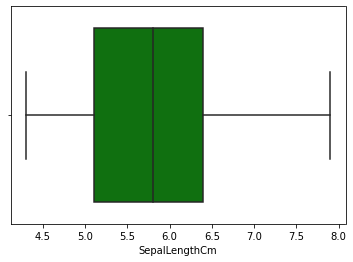

In [6]:
sns.boxplot('SepalLengthCm',data=data, color='g')

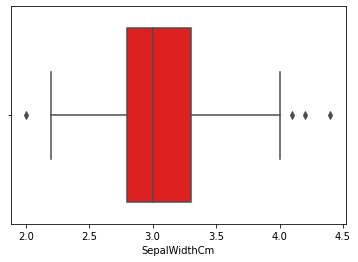

In [7]:
sns.boxplot('SepalWidthCm',data=data, color='r')

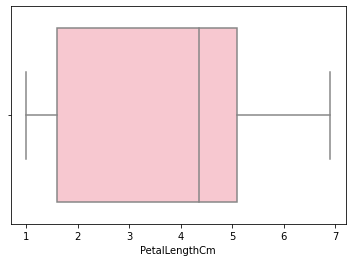

In [8]:
sns.boxplot('PetalLengthCm',data=data, color='pink')

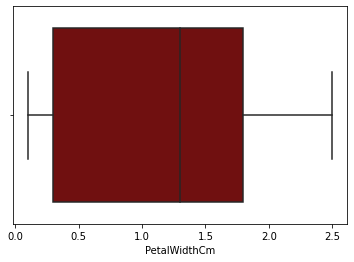

In [9]:
sns.boxplot('PetalWidthCm',data=data, color='maroon')

In [10]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## There's not much outliers in our data set

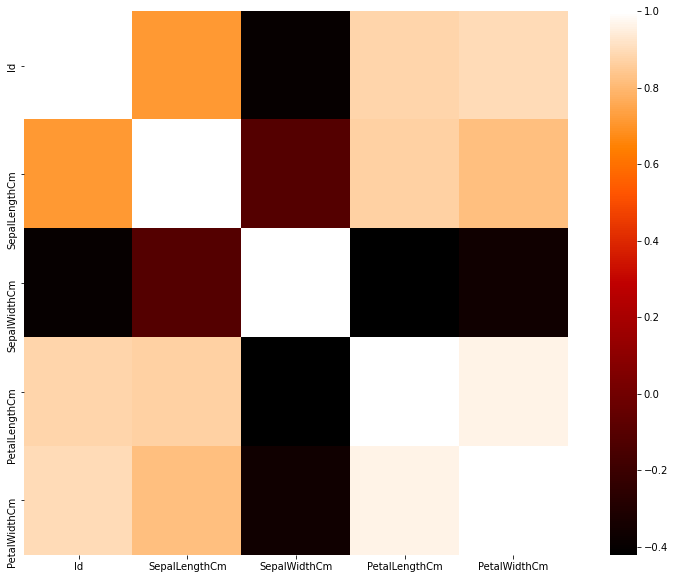

In [11]:
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), square=True, cmap='gist_heat')

## From the heatmap we can see the relation between features in the dataset

# Pre-Processing

In [12]:
data['Species']=data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
data['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [13]:
x = data.drop('Species',axis=1)
y = data['Species']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=666)

# Training the model

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier()

In [17]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
model.score(x_train,y_train)

1.0

In [19]:
model.score(x_test,y_test)

1.0

In [20]:
train_accuracy = []
validation_accuracy = []

for i in range(1,11):
    tree = DecisionTreeClassifier(random_state=10, max_depth=i)
    tree.fit(x_train,y_train)
    train_accuracy.append(tree.score(x_train,y_train))
    validation_accuracy.append(tree.score(x_test,y_test))

In [21]:
results = pd.DataFrame({'Max_Depth':range(1,11),'Train_Accuracy':train_accuracy,'Validation_Accuracy':validation_accuracy})
results

,Max_Depth,Train_Accuracy,Validation_Accuracy
0,1,0.6875,0.605263
1,2,1.0000,1.000000
2,3,1.0000,1.000000
3,4,1.0000,1.000000
4,5,1.0000,1.000000
5,6,1.0000,1.000000
6,7,1.0000,1.000000
7,8,1.0000,1.000000
8,9,1.0000,1.000000
9,10,1.0000,1.000000


## We can see that after max_depth = 2, the model continues to produce same accuracy

In [22]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

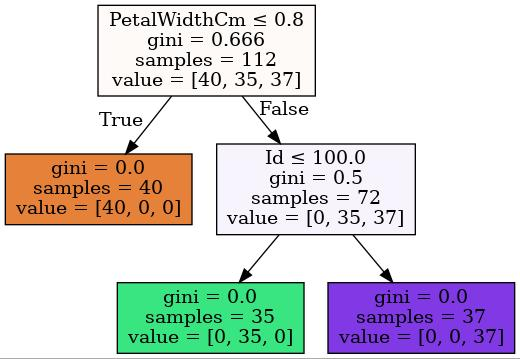

In [23]:
dot_data = StringIO()

export_graphviz(model, out_file=dot_data, feature_names=x.columns,filled=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_jpg())